# 🧾 Yulu Business Case Study- Hypothesis Testing
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

## ❓Business Problem 
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.
The company wants to know:
* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands

In [309]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
data = pd.read_csv("bike_sharing.csv")

In [310]:
print("First few rows of dataset:")
data.head()

First few rows of dataset:


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [311]:
print("Rows and columns in the Dataset:")
data.shape

Rows and columns in the Dataset:


(10886, 12)

In [312]:
print("Columns in the dataset:")
data.columns

Columns in the dataset:


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### 📊Statistical Information about Dataset

In [314]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Checking for missing Values

In [315]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

As datetime column is of datatype "Object" we need to convert into datatime datatype.

In [316]:
data["datetime"] = pd.to_datetime(data["datetime"])

#### Univariate Analysis
Continuous Variables:
* For Continous data we use Histogram for visulization, so that we can easily Identify trends and patterns.

c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

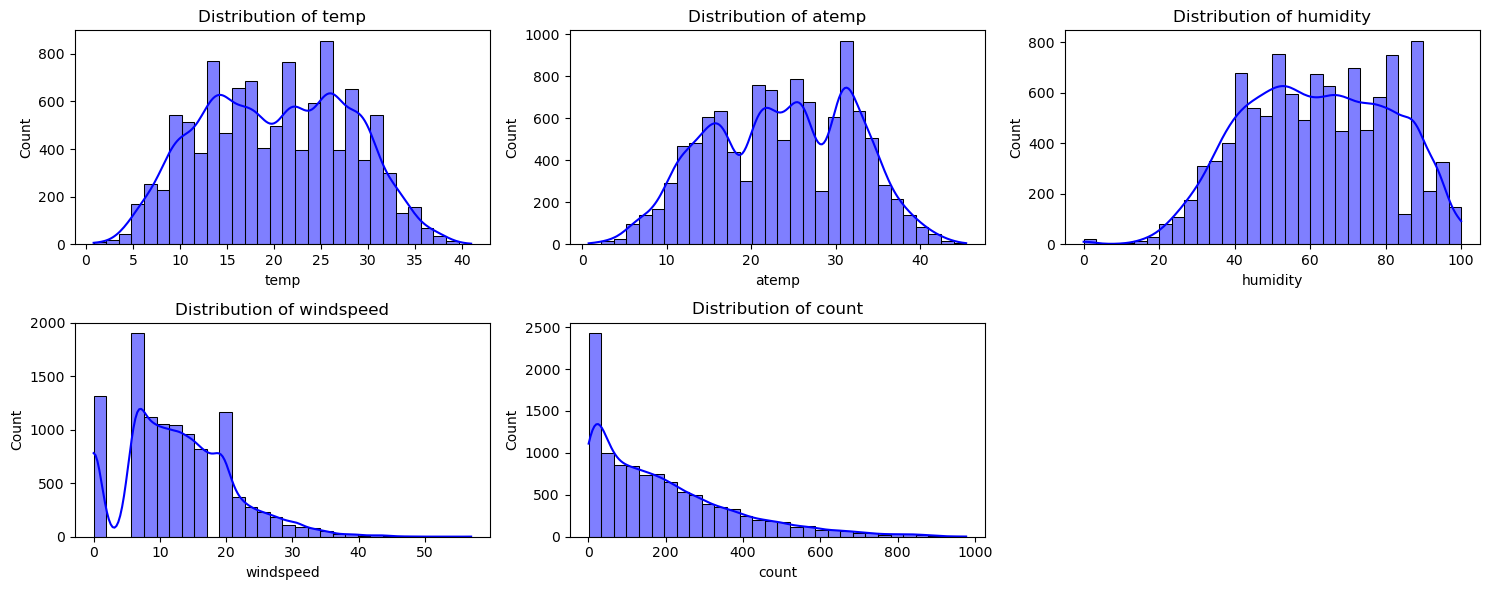

In [317]:
def plot_histograms(columns, data):
    plt.figure(figsize=(15, 6))
    for i, col in enumerate(columns):
        plt.subplot(2, 3, i+1)
        sns.histplot(data[col], bins=30, kde=True, color="blue")
        plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

plot_histograms(["temp", "atemp", "humidity", "windspeed", "count"], data)

#### 🔍 Insights
1) temp:
    * The distribution of temp appears approximately normal, centered around 20-25°C.
    * There are very few extreme low or high temperatures.
2) atemp: 
    * The distribution of atemp follows a similar pattern to temp(Normal).
    * It shows small disturbance, possibly indicating different seasonal trends.
3) humidity: 
    * The distribution of humidity is right-skewed, means most days have high humidity (above 50%).
    * There are some extreme values near 100%, so days are very high Humidity(around 100).
4) windspeed:
    * Windspeed has a right-skewed distribution, with most values clustered around low speeds (0-20).
    * There are some outliers with high wind speeds above 40.
5) count: 
    * The count of bike rentals is heavily right-skewed, meaning that most rental instances involve relatively low counts, but a few days have extremely high rentals.
    * This suggests that demand is not uniform

##### * For checking the outliers present in the numeric columns we use Boxplot. also by using boxplot we got information about median data and data distribution.

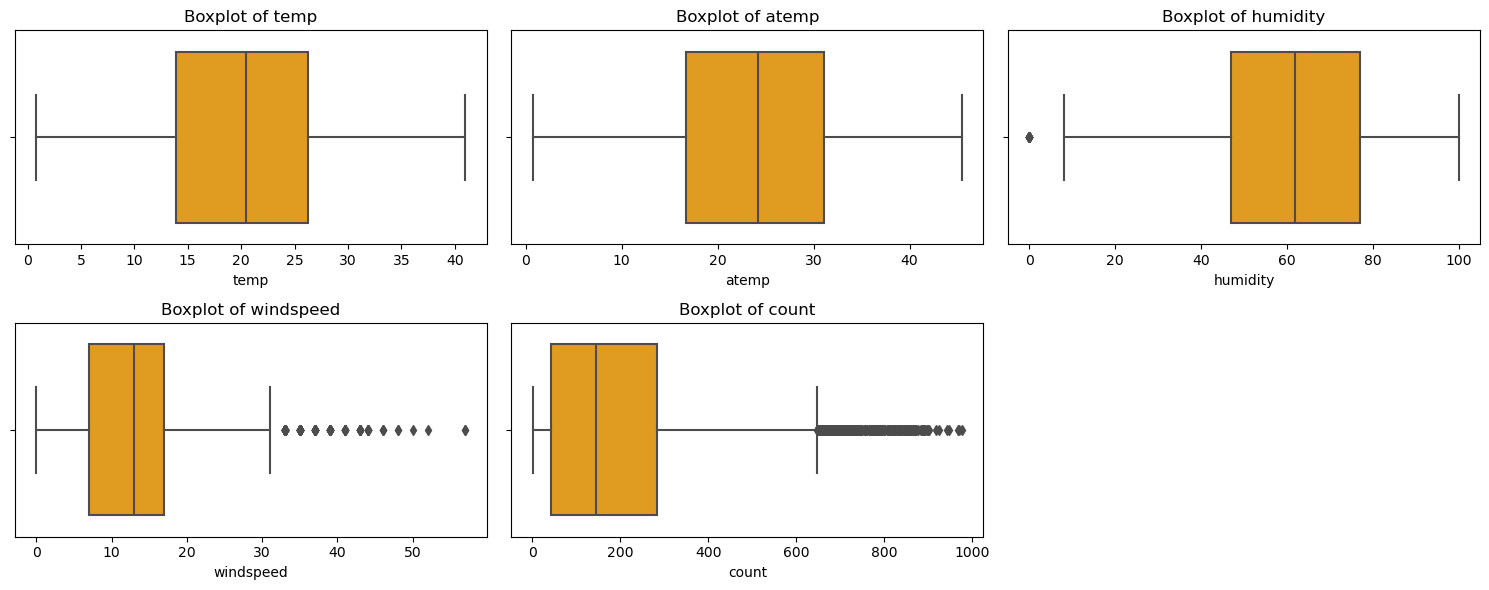

In [318]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(["temp", "atemp", "humidity", "windspeed", "count"]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=data[col], color="orange")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


#### 🔍 Insights
1) temp:
    * The data is symmetrically distributed, with the median near the center of the box.
    * No outliers are present, indicating a consistent temperature range.
2) atemp:
    * Similar to temp, the atemp distribution is symmetrical with no extreme outliers.
    * Median is well-centered, suggesting balanced variance.
3) humidity:
    * The data is right-skewed, with a few lower outliers around 0-20% humidity.
    * The interquartile range (IQR) is large, meaning humidity varies widely.
4) windspeed:
    * Several outliers on the higher end (>30).
    * The box is shorter, meaning most values are tightly clustered between 0-20 (low wind speeds).
5) count: 
    * The distribution is heavily right-skewed, meaning most days have low rentals, but a few days have extremely high demand.
    * Presence of outliers on the higher end, indicating peak rental days.

Categorical Variables
* For analyze categorical features we use countplot

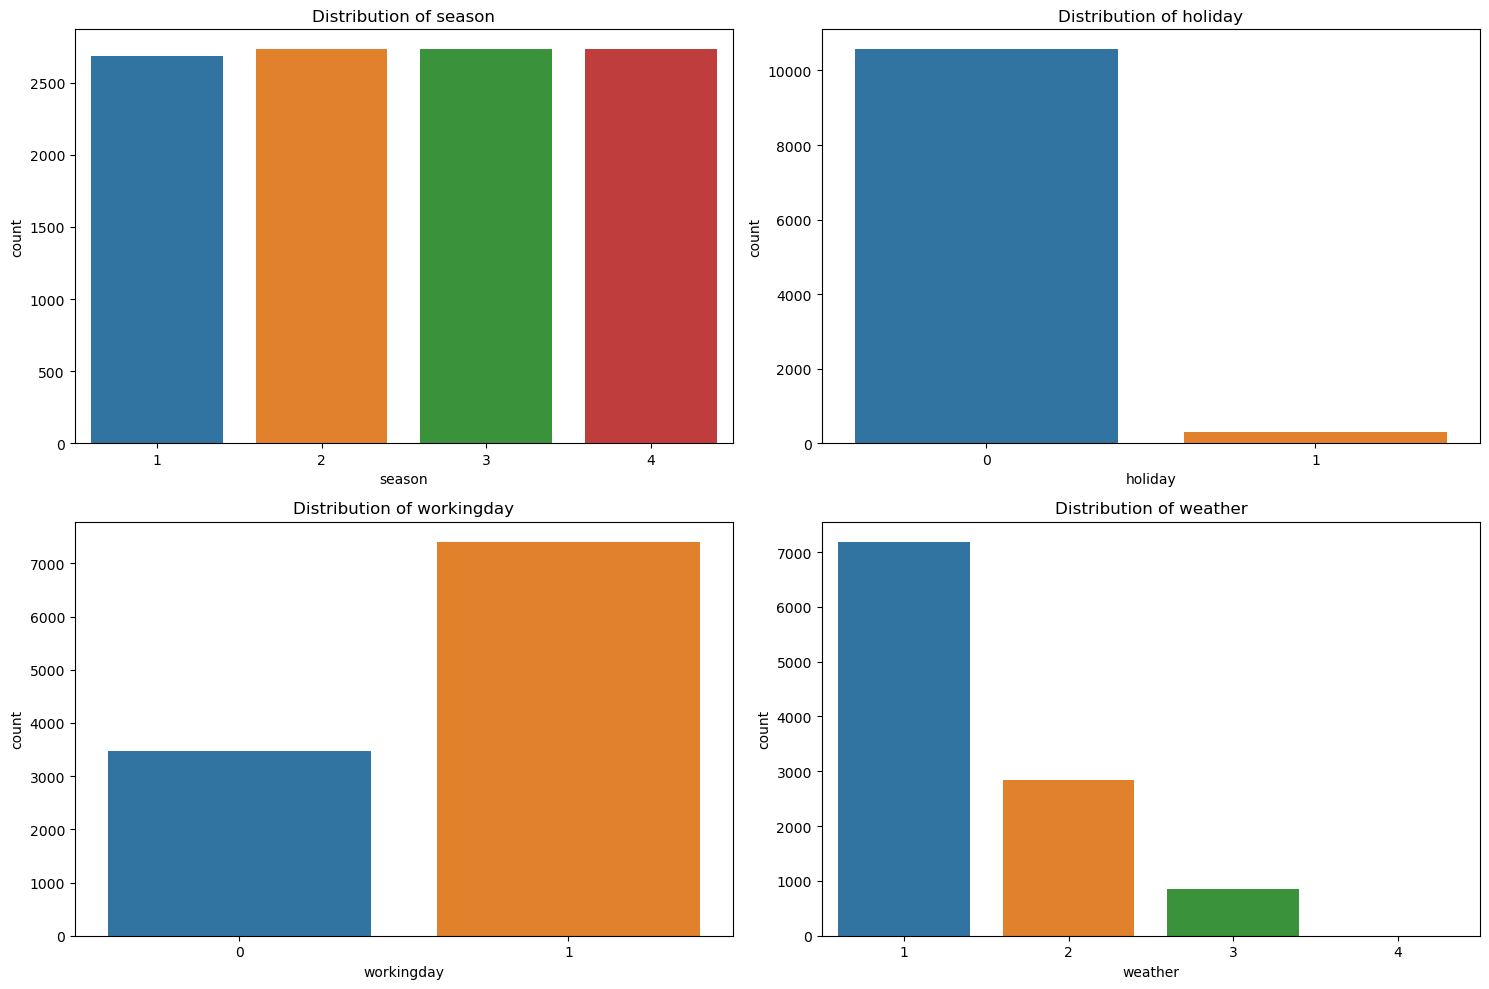

In [319]:
def plot_categorical(columns, data):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns):
        plt.subplot(2, 2, i+1)
        sns.countplot(x=col, data=data)
        plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()
plot_categorical(["season", "holiday", "workingday", "weather"], data)

#### 🔍 Insights
1) season: 
    * All four seasons have almost equal distribution, indicating balanced data across seasons.
2) holiday:
    * Most data points belong to non-holidays (0), while very few represent holidays (1).
3) workingday:
    * There are more working days (1) than non-working days (0) in the dataset.
    * large portion of users rent bikes on working days.
4) weather:
    * The majority of days have good weather (category 1), followed by moderate weather (category 2).
    * A few days have bad weather (category 3), and category 4 (extreme weather) is either missing or rare.

#### Bivariate Analysis
* we analyze how count (bike rentals) is influenced by other variables.
* For this we first compute the correlation coefficient between numerical variables. Then use Correlation Matrix checking the reationship between them

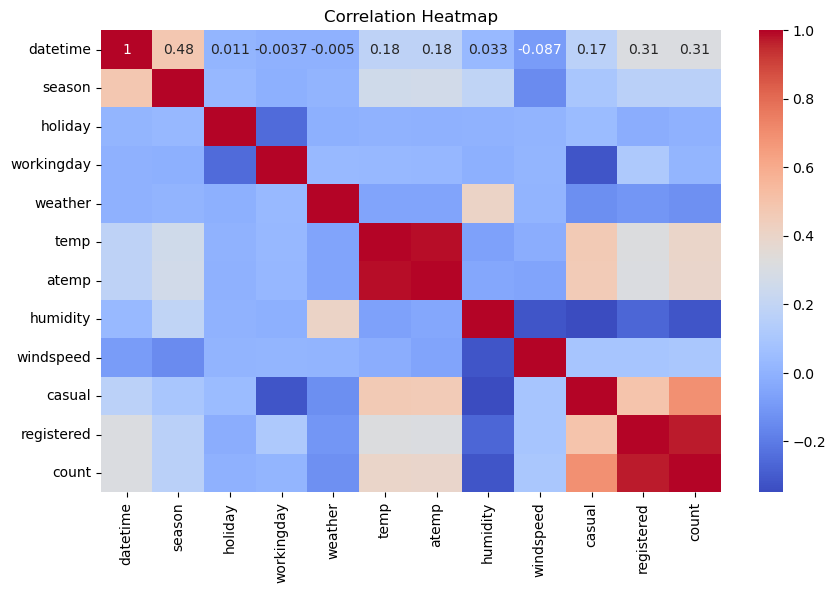

In [320]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#### 🔍 Insights
1) Registered Users (registered) has High Positive Correlation (~0.95) with count.
2) Casual Users (casual) has Moderate Positive Correlation (~0.67) with count.
3) temp & atemp has Moderate Positive Correlation (~0.31) with count.
4) humidity have Weak Positive Correlation (~0.17) with count.
5) Season has Weak Positive Correlation (~0.18) with count.
6) Weather and windspeed has Weak Negative Correlation.
7) workingday has Weak Positive Correlation (~0.03-0.05) with count.

Bike Rentals by Season

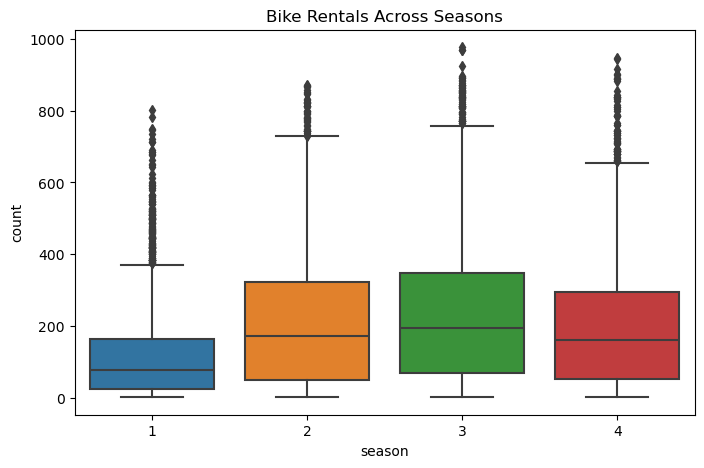

In [321]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="season", y="count", data=data)
plt.title("Bike Rentals Across Seasons")
plt.show()

#### 🔍Insights
* Winter (Season 1) has the lowest median rentals, indicating reduced biking activity, likely due to cold weather.
* Spring (Season 2), Summer (Season 3), and Fall (Season 4) have higher rental counts, showing increased demand in warmer months.

Bike Rentals by Weather

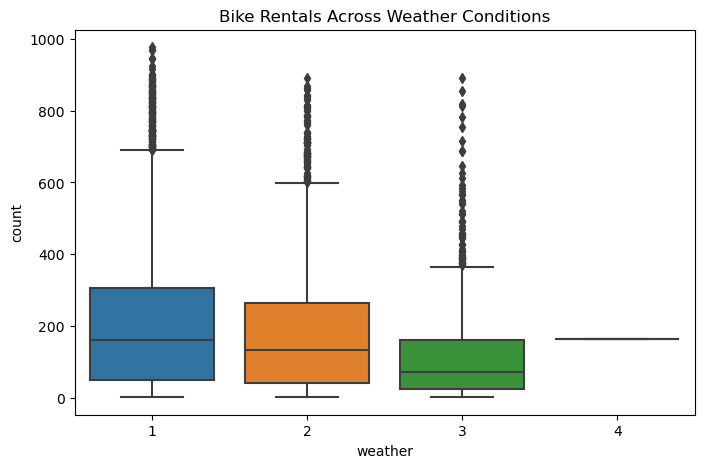

In [322]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="weather", y="count", data=data)
plt.title("Bike Rentals Across Weather Conditions")
plt.show()


#### 🔍Insights
* Weather Condition 1 has the highest median bike rentals. The interquartile range (IQR) is wider, indicating more variation in demand. Many high outliers, suggesting some extreme rental days in clear weather.
* Weather Condition 2 shows a slightly lower rental median than Condition 1. 
* Weather Condition 3 leads to a sharp drop in rentals. Rentals decrease significantly compared to better weather conditions. The median rental count is low, and the spread is narrow. 
* Weather Condition 4 has almost no rentals. Rentals are nearly nonexistent in extreme weather conditions. People avoid biking in harsh weather, leading to very few recorded rentals.

Bike Rentals on Working vs. Non-Working Days

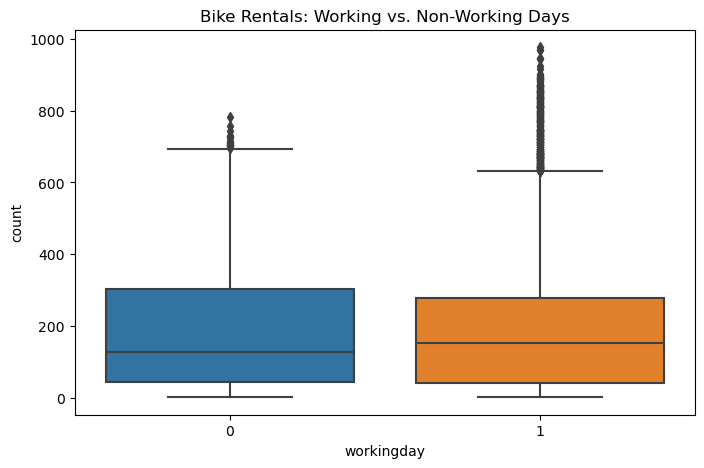

In [323]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="workingday", y="count", data=data)
plt.title("Bike Rentals: Working vs. Non-Working Days")
plt.show()


#### 🔍Insights
* More rentals on working days compared to weekends or holidays.
* The median rental count is almost identical for both working days (1) and non-working days (0).
* There are more high outliers on working days, suggesting some days experience exceptionally high demand, possibly due to commuters.

Hourly Bike Demand Trend

In [324]:
data['hour'] = data['datetime'].dt.hour

c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


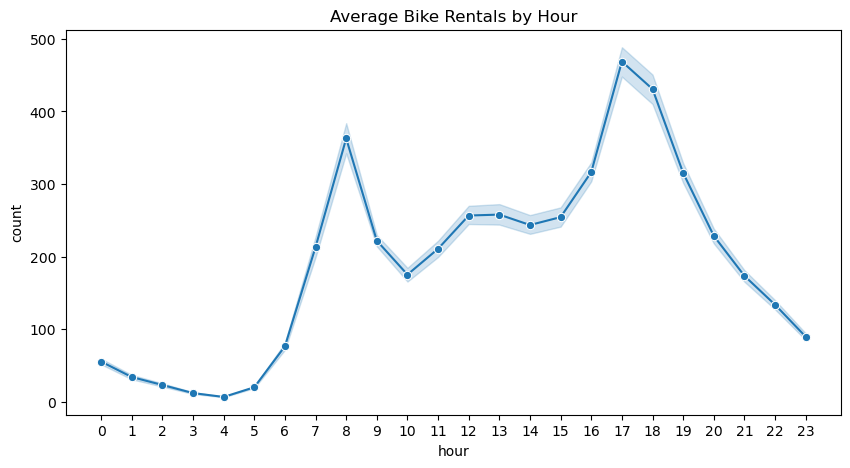

In [325]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="hour", y="count", data=data, marker="o")
plt.title("Average Bike Rentals by Hour")
plt.xticks(range(0, 24))
plt.show()


#### 🔍Insights
* Morning peak at 8 AM: Likely due to people commuting to work or school.
* Evening peak at 5-6 PM: Corresponds to commuters heading home.
* Low activity during late night and early morning (12 AM - 5 AM), Very few rentals occur during these hours, as expected, since most people are not traveling.
* Steady rentals between 10 AM - 3 PM
* Sharp decline after 6 PM, as people reach home after work, demand for bikes drops quickly.


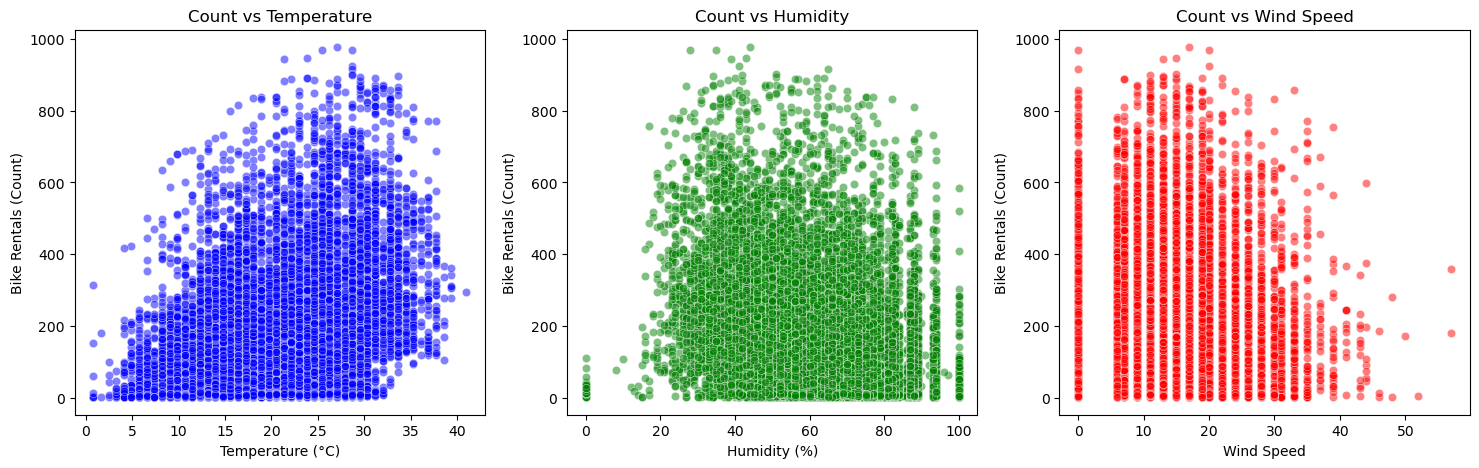

In [326]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Count vs Temperature
sns.scatterplot(ax=axes[0], x=data["temp"], y=data["count"], alpha=0.5, color="blue")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("Bike Rentals (Count)")
axes[0].set_title("Count vs Temperature")

#Count vs Humidity
sns.scatterplot(ax=axes[1], x=data["humidity"], y=data["count"], alpha=0.5, color="green")
axes[1].set_xlabel("Humidity (%)")
axes[1].set_ylabel("Bike Rentals (Count)")
axes[1].set_title("Count vs Humidity")

# Count vs Wind Speed
sns.scatterplot(ax=axes[2], x=data["windspeed"], y=data["count"], alpha=0.5, color="red")
axes[2].set_xlabel("Wind Speed")
axes[2].set_ylabel("Bike Rentals (Count)")
axes[2].set_title("Count vs Wind Speed")
plt.show()

#### 🔍 Insights
1) Count vs Temperature:
    * Positive correlation- More rentals as temperature increases.
    * Few rentals in very cold weather and peak in warm conditions.
2) Count vs Humidity:
    * Slight negative correlation → Higher humidity may reduce bike rentals.
    * Moderate humidity levels have higher rentals.
3) Count vs Wind Speed:
    * No strong correlation → Rentals occur across all wind speed levels.

## 🧪Hypothesis Testing

### ❓1) Effect of Working Day on Rentals (2- Sample T-Test)

[]

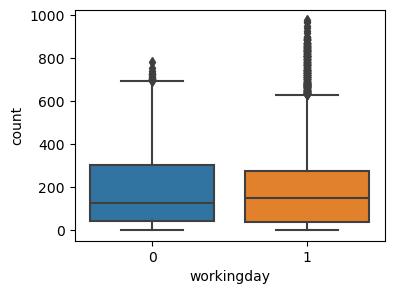

In [327]:
plt.figure(figsize = (4, 3))
sns.boxplot(data = data, x = 'workingday', y = 'count')
plt.plot()

In [328]:
working_day_rentals = data[data["workingday"] == 1]["count"]
non_working_day_rentals = data[data["workingday"] == 0]["count"]

***STEP-1*** : Set up null and alternet hypothesis.
* **Null Hypothesis ( H0 )**: The mean number of rented bikes is the same on working and non-working days.
* **Alternate Hypothesis ( HA )**: The mean number of rented bikes is different on working and non-working days.
---
***STEP-2*** : Checking for basic assumpitons for hypothesis.
* Independence: The two groups must be independent of each other.
* Normality: The data in each group should be approximately normally distributed, especially for small sample sizes (n < 30).
* Homogeneity of Variance: The variances of the two groups should be equal
--- 
***STEP-3***: Perform the T-Test
* Calculate the T-Statistic
--- 
***STEP-4***: Find the Critical Value and P-Value
* Use a T-distribution table or statistical software to find the critical value or p-value based on the calculated t-statistic and degrees of freedom.
* Compare the p-value to your significance level (α, commonly 0.05).
---
***STEP-5***: Make a Decision
* If the p-value < α, reject the null hypothesis (H₀). This indicates a statistically significant difference between the two group means.
* If the p-value ≥ α, fail to reject the null hypothesis (H₀). This indicates no statistically significant difference between the two group means.

***Let's perform test as above given steps***

***Visual Tests to know if the samples follow normal distribution***

c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

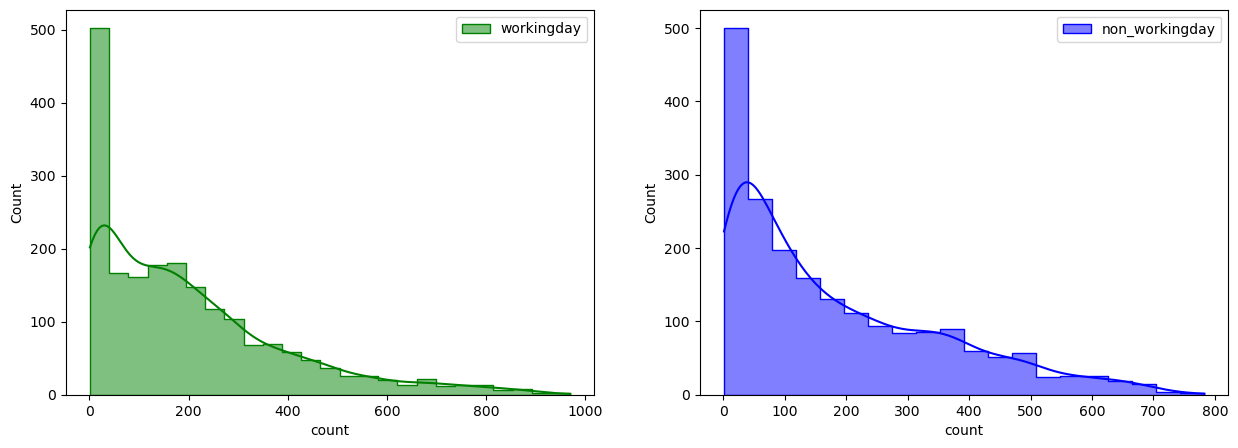

In [329]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data.loc[data['workingday'] == 1, 'count'].sample(2000),element = 'step', color = 'green', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(data.loc[data['workingday'] == 0, 'count'].sample(2000),element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.

***Let's check using QQ Plot***

In [330]:
working_day_rentals_sample = data[data["workingday"] == 1]["count"].sample(2000)
non_working_day_rentals_sample = data[data["workingday"] == 0]["count"].sample(2000)

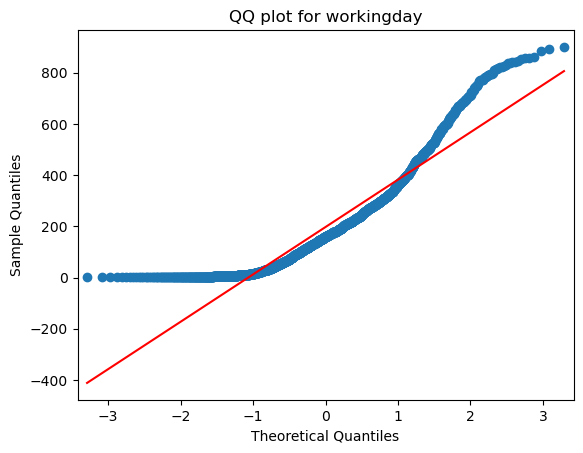

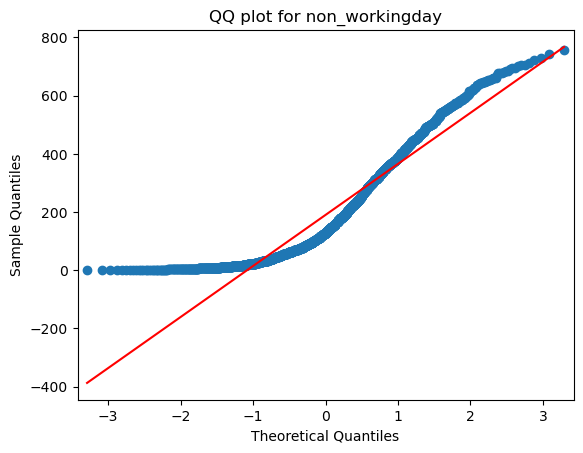

In [331]:
import statsmodels.api as sm
sm.qqplot(working_day_rentals_sample,line="s")
plt.title('QQ plot for workingday')
sm.qqplot(non_working_day_rentals_sample,line="s")
plt.title('QQ plot for non_workingday')
plt.show()



From above qqplots we see that both working and non-working does not follows normal distribution.

***Check by using Shapiro-Wilk test***
* **Null Hypothesis ( H0 )**: Sample follows normal distribution.
* **Alternate Hypothesis ( HA )**: Sample does not follows normal distribution.
* **alpha = 0.5**

In [332]:
#for working day
from scipy.stats import shapiro
s_stat,pval = shapiro(working_day_rentals_sample)
s_stat,pval

(0.8761656537207889, 3.266573083865804e-37)

In [333]:
alpha = 0.05
if pval < alpha:
  print("Sample does not follows normal distribution")
else:
  print("Sample follows normal distribution")

Sample does not follows normal distribution


In [334]:
#for non-working day
s_stat,pval = shapiro(non_working_day_rentals_sample)
s_stat,pval

(0.8839922447281219, 2.6865406439514066e-36)

In [335]:
alpha = 0.05
if pval < alpha:
  print("Sample does not follows normal distribution")
else:
  print("Sample follows normal distribution")

Sample does not follows normal distribution


In  both for working day and non working day it shows that data does not follows normal distribution

**Not lets check Equality of Variance using Levene’s Test**
* **Null Hypothesis ( H0 )**: variance of working and non-working are equal.
* **Alternate Hypothesis ( HA )**: variance of working and non-working are not equal.
* **alpha = 0.5**

In [336]:
from scipy.stats import levene
l_stat,pval = levene(working_day_rentals_sample,non_working_day_rentals_sample)
l_stat,pval

(0.14126146512761967, 0.7070500928445936)

In [337]:
alpha = 0.05
if pval < alpha:
  print("Sample does not follows normal distribution")
else:
  print("Sample follows normal distribution")

Sample follows normal distribution


From above test we conclude that distribution of data is not normal and variance is also not equal so we can't perform **Two sample Ttest** here.

In this condition we can use Non-Parametric Hypothesis Testing, we use Mann-Whitney U rank test for two independent samples.
* **Null Hypothesis ( H0 )**: The mean number of rented bikes is same on working and non-working days.
* **Alternate Hypothesis ( HA )**: The mean number of rented bikes is different on working and non-working days.

In [338]:
from scipy.stats import mannwhitneyu 
m_stat,pval = mannwhitneyu(working_day_rentals,non_working_day_rentals)
m_stat,pval

(12868495.5, 0.9679139953914079)

In [339]:
if pval < alpha:
  print("The mean number of rented bikes is different on working and non-working days")
else:
  print("The mean number of rented bikes is same on working and non-working days")

The mean number of rented bikes is same on working and non-working days


**We can also perfrom direct two sample ttest considering both follows normal distribution and equal variance.**
* **Null Hypothesis ( H0 )**: The mean number of rented bikes is same on working and non-working days.
* **Alternate Hypothesis ( HA )**: The mean number of rented bikes is different on working and non-working days.

In [340]:
from scipy.stats import ttest_ind
tstat,pval = ttest_ind(working_day_rentals,non_working_day_rentals)
tstat,pval

(1.2096277376026694, 0.22644804226361348)

In [341]:
if pval < alpha:
  print("The mean number of rented bikes is different on working and non-working days")
else:
  print("The mean number of rented bikes is same on working and non-working days")

The mean number of rented bikes is same on working and non-working days


#### ✔️**conclusion:** So We can say that working day has no effect on number of electric cycles.

### ❓2) No. of cycles rented is similar or different in different wather.

In [342]:
data.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


[]

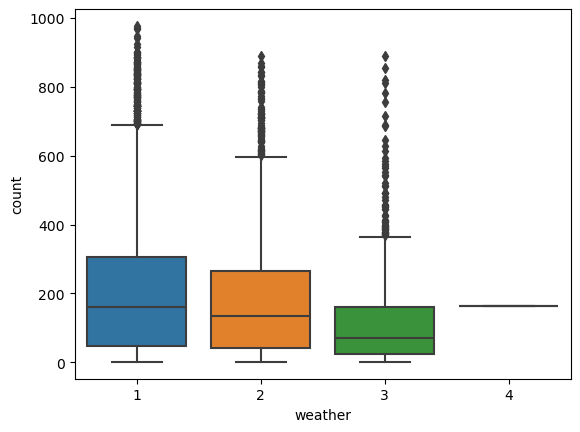

In [343]:
sns.boxplot(data = data, x = 'weather', y = 'count')
plt.plot()

In [344]:
weather1 = data[data['weather']==1]['count'].values
weather2 = data[data['weather']==2]['count'].values
weather3 = data[data['weather']==3]['count'].values
weather4 = data[data['weather']==4]['count'].values
len(weather1), len(weather2), len(weather3), len(weather4)

(7192, 2834, 859, 1)

***STEP-1*** : Set up null and alternet hypothesis.
* **Null Hypothesis ( H0 )**: The mean number of rented cycles is the same across different weather conditions.
* **Alternate Hypothesis ( HA )**: The mean number of rented cycles is different across weather conditions.
---
***STEP-2*** : Checking for basic assumpitons for hypothesis.
* Independence: The two groups must be independent of each other.
* Normality: The data in each group should be approximately normally distributed, especially for small sample sizes (n < 30).
* Homogeneity of Variance: The variances of the two groups should be equal
--- 
***STEP-3***: Perform the Anova
* Calculate the test-Statistic
--- 
***STEP-4***: Find the Critical Value and P-Value
* Use a T-distribution table or statistical software to find the critical value or p-value based on the calculated t-statistic and degrees of freedom.
* Compare the p-value to your significance level (α, commonly 0.05).
---
***STEP-5***: Make a Decision
* If the p-value < α, reject the null hypothesis (H₀). The mean number of rented cycles is different across weather conditions.
* If the p-value ≥ α, fail to reject the null hypothesis (H₀). The mean number of rented cycles is the same across different weather conditions..

***Let's perform test as above given steps***

***Visual Tests to know if the samples follow normal distribution***

c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

Text(0.5, 1.0, 'Wather 4')

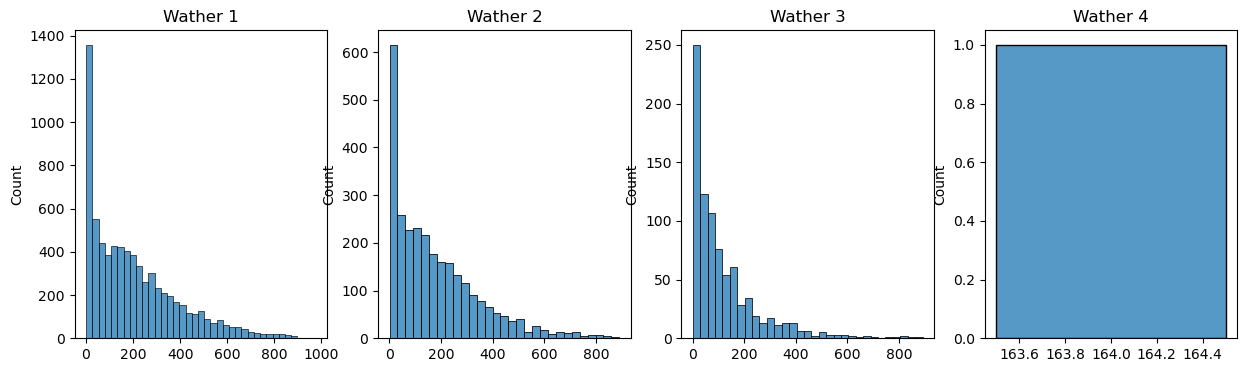

In [345]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 4, 1)
sns.histplot(weather1)
plt.title("Wather 1")

plt.subplot(1, 4, 2)
sns.histplot(weather2)
plt.title("Wather 2")

plt.subplot(1, 4, 3)
sns.histplot(weather3)
plt.title("Wather 3")

plt.subplot(1, 4, 4)
sns.histplot(weather4)
plt.title("Wather 4")

From above plot it refers that distribution is not normally distribted.

***Let's check distribution using QQ Plot***

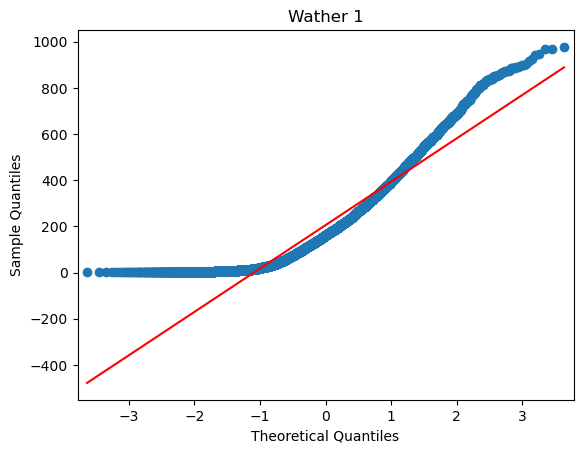

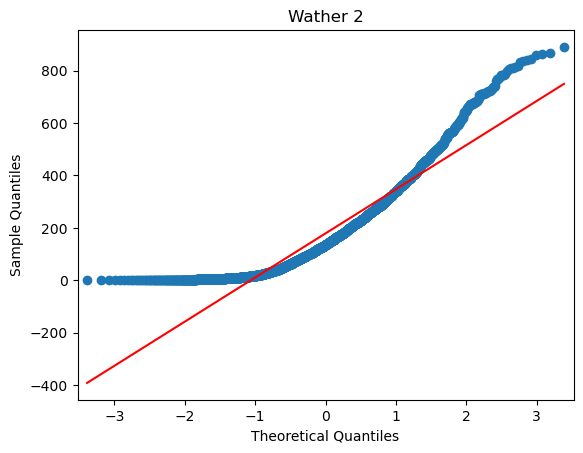

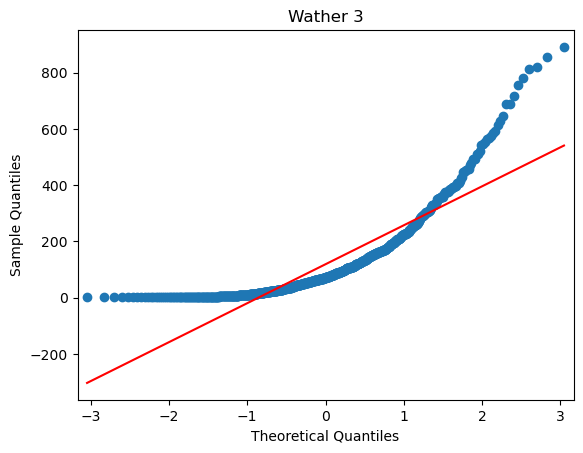

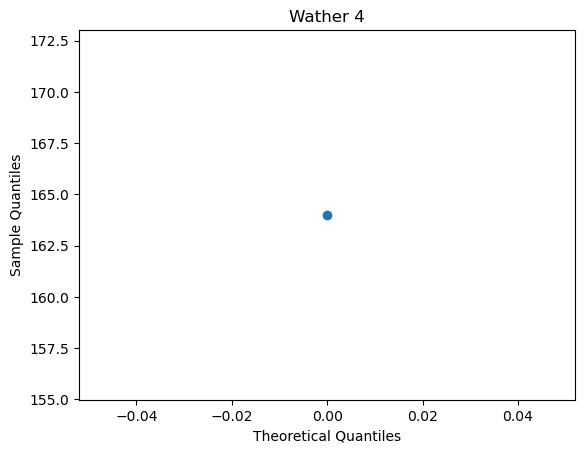

In [346]:
sm.qqplot(weather1,line="s")
plt.title('Wather 1')

sm.qqplot(weather2,line="s")
plt.title('Wather 2')

sm.qqplot(weather3,line="s")
plt.title('Wather 3')

sm.qqplot(weather4,line="s")
plt.title('Wather 4')
plt.show()

From above qqplots we also refer that data is not normally distributed.

**Let's check by using Shapiro-Wilk test for normality**
* **Null Hypothesis ( H0 )**: Sample follows normal distribution.
* **Alternate Hypothesis ( HA )**: Sample does not follows normal distribution.
* **alpha = 0.5**

In [347]:
#for weather1
from scipy.stats import shapiro
s_stat,pval = shapiro(weather1)
s_stat,pval

C:\Users\victus\AppData\Local\Temp\ipykernel_2228\291439007.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  s_stat,pval = shapiro(weather1)


(0.8909259459740138, 1.5964921477006555e-57)

In [348]:
alpha = 0.05
if pval < alpha:
  print("data does not follows normal distribution")
else:
  print("data follows normal distribution")

data does not follows normal distribution


In [349]:
#for weather2
from scipy.stats import shapiro
s_stat,pval = shapiro(weather2)
s_stat,pval

(0.8767694973495206, 9.777839106111785e-43)

In [350]:
alpha = 0.05
if pval < alpha:
  print("data does not follows normal distribution")
else:
  print("data follows normal distribution")

data does not follows normal distribution


In [351]:
#for weather3
from scipy.stats import shapiro
s_stat,pval = shapiro(weather3)
s_stat,pval

(0.7674327906035717, 3.875893017396149e-33)

In [352]:
alpha = 0.05
if pval < alpha:
  print("data does not follows normal distribution")
else:
  print("data follows normal distribution")

data does not follows normal distribution


All the wathers does not follows normal distribution.

**Not lets check Equality of Variance using Levene’s Test**
* **Null Hypothesis ( H0 )**: For all wathers varience of data is Homogenous.
* **Alternate Hypothesis ( HA )**: For all wathers varience of data is not Homogenous.
* **alpha = 0.5**

In [353]:
from scipy.stats import levene
l_stat,pval = levene(weather1,weather2,weather3,weather4)
l_stat,pval

(54.85106195954556, 3.504937946833238e-35)

In [354]:
alpha = 0.05
if pval < alpha:
  print("For all wathers varience of data is not Homogenous.")
else:
  print("For all wathers varience of data is Homogenous.")

For all wathers varience of data is not Homogenous.


From above test we conclude that distribution of data is not normal and variance is also not equal so we can't perform **ANOVA Test** here.

In this condition we can use Non-Parametric Hypothesis Testing, we use Kruskal-Wallis H-test for independent samples.
* **Null Hypothesis ( H0 )**: The mean number of rented cycles is the same across different weather conditions.
* **Alternate Hypothesis ( HA )**: The mean number of rented cycles is different across weather conditions.

In [355]:
from scipy.stats import kruskal
test_stat, pval = kruskal(weather1, weather2, weather3,weather4)  
test_stat, pval

(205.00216514479087, 3.501611300708679e-44)

In [356]:
alpha = 0.5
if pval < alpha:
    print("Reject H₀: There is a significant difference in rentals across weather conditions.")
else:
    print("Fail to Reject H₀: No significant difference in rentals across weather conditions.")

Reject H₀: There is a significant difference in rentals across weather conditions.


**We can also perfrom direct one way anova test considering both follows normal distribution and equal variance.**
* **Null Hypothesis ( H0 )**: The mean number of rented cycles is the same across different weather conditions.
* **Alternate Hypothesis ( HA )**: The mean number of rented cycles is different across weather conditions.

In [357]:
from scipy.stats import f_oneway
test_stat,pval = f_oneway(weather1,weather2,weather3,weather4)
test_stat,pval

(65.53024112793271, 5.482069475935669e-42)

In [358]:
alpha = 0.5
if pval < alpha:
    print("Reject H₀: There is a significant difference in rentals across weather conditions.")
else:
    print("Fail to Reject H₀: No significant difference in rentals across weather conditions.")

Reject H₀: There is a significant difference in rentals across weather conditions.


#### ✔️**conclusion:** So we can say that There is a significant difference in rentals across weather conditions.

### ❓3) No. of cycles rented is similar or different in different Season.

In [359]:
data.groupby(by = 'season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


[]

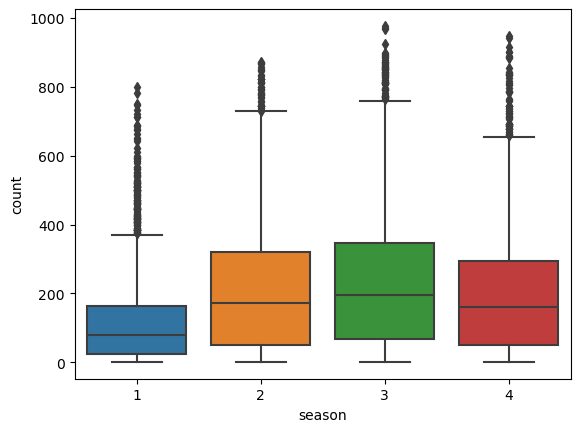

In [360]:
sns.boxplot(data = data, x = 'season', y = 'count')
plt.plot()

In [361]:
season1 = data[data['season']==1]['count'].values
season2 = data[data['season']==2]['count'].values
season3 = data[data['season']==3]['count'].values
season4 = data[data['season']==4]['count'].values
len(season1), len(season2), len(season3), len(season4)

(2686, 2733, 2733, 2734)

***STEP-1*** : Set up null and alternet hypothesis.
* **Null Hypothesis ( H0 )**: The mean number of rented cycles is the same across different seasons.
* **Alternate Hypothesis ( HA )**: The mean number of rented cycles is different across seasons.
---
***STEP-2*** : Checking for basic assumpitons for hypothesis.
* Independence: The two groups must be independent of each other.
* Normality: The data in each group should be approximately normally distributed, especially for small sample sizes (n < 30).
* Homogeneity of Variance: The variances of the two groups should be equal
--- 
***STEP-3***: Perform the Anova
* Calculate the test-Statistic
--- 
***STEP-4***: Find the Critical Value and P-Value
* Use a T-distribution table or statistical software to find the critical value or p-value based on the calculated t-statistic and degrees of freedom.
* Compare the p-value to your significance level (α, commonly 0.05).
---
***STEP-5***: Make a Decision
* If the p-value < α, reject the null hypothesis (H₀). TThe mean number of rented cycles is different across seasons.
* If the p-value ≥ α, fail to reject the null hypothesis (H₀). The mean number of rented cycles is the same across different seasons.

***Let's perform test as above given steps***

***Visual Tests to know if the samples follow normal distribution***

c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

Text(0.5, 1.0, 'season 4')

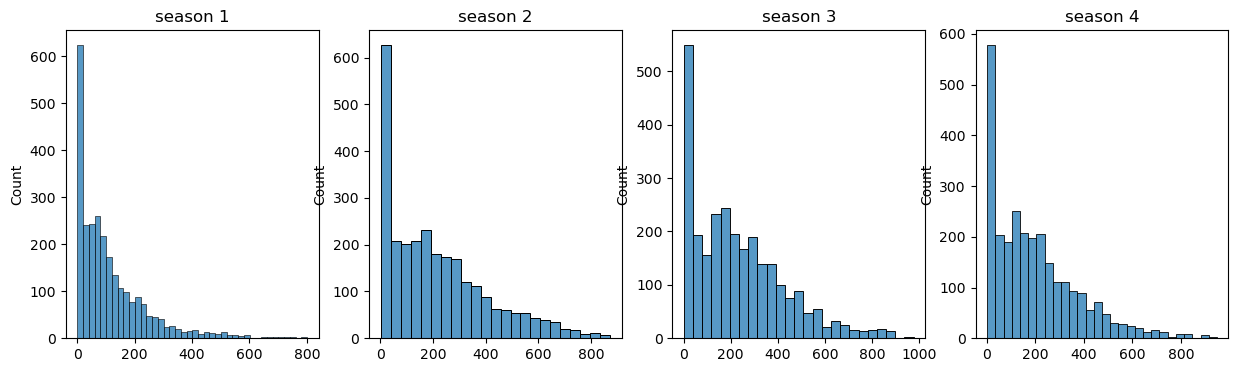

In [362]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 4, 1)
sns.histplot(season1)
plt.title("season 1")

plt.subplot(1, 4, 2)
sns.histplot(season2)
plt.title("season 2")

plt.subplot(1, 4, 3)
sns.histplot(season3)
plt.title("season 3")

plt.subplot(1, 4, 4)
sns.histplot(season4)
plt.title("season 4")

From above plot it refers that distribution is not normally distribted.

***Let's check distribution using QQ Plot***

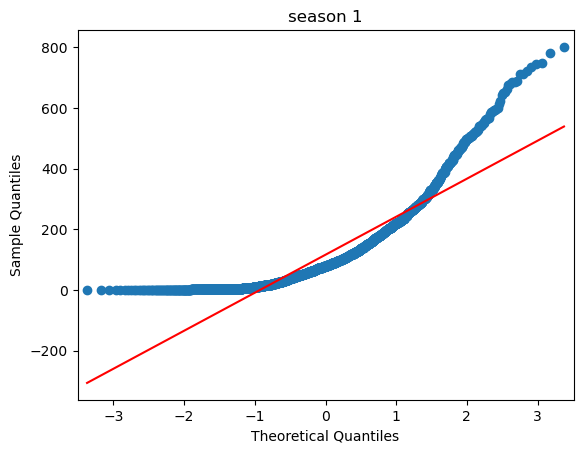

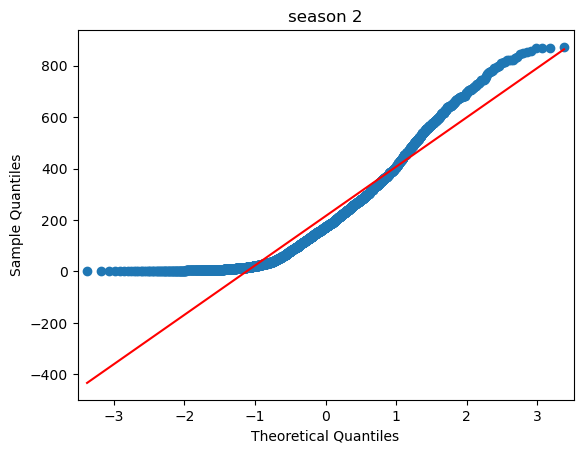

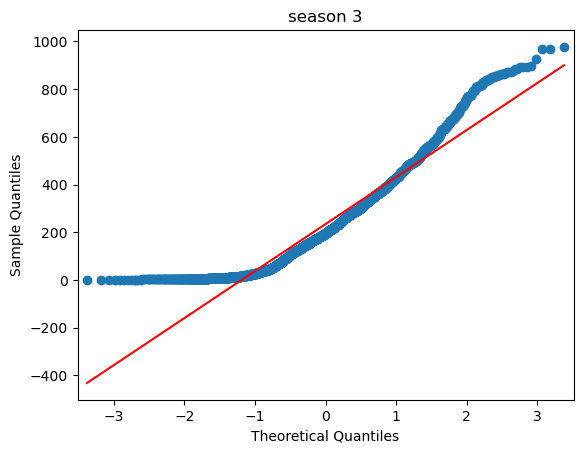

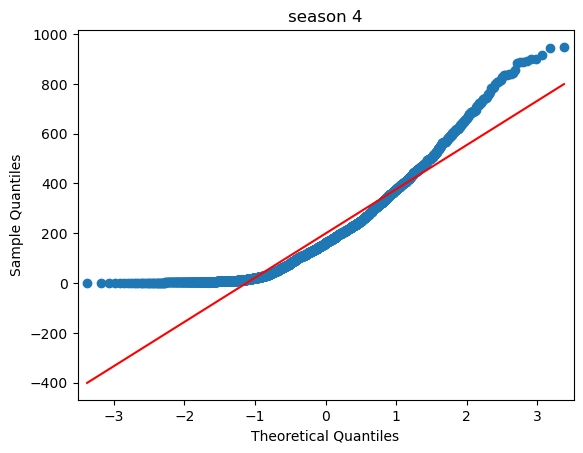

In [363]:
sm.qqplot(season1,line="s")
plt.title('season 1')

sm.qqplot(season2,line="s")
plt.title('season 2')

sm.qqplot(season3,line="s")
plt.title('season 3')

sm.qqplot(season4,line="s")
plt.title('season 4')
plt.show()

From above qqplots we also refer that data is not normally distributed.

**Let's check by using Shapiro-Wilk test for normality**
* **Null Hypothesis ( H0 )**: data follows normal distribution.
* **Alternate Hypothesis ( HA )**: data does not follows normal distribution.
* **alpha = 0.5**

In [364]:
#for season1
s_stat,pval = shapiro(season1)
s_stat,pval

(0.8087378401253588, 8.749584618867662e-49)

In [365]:
alpha = 0.05
if pval < alpha:
  print("data does not follows normal distribution")
else:
  print("data follows normal distribution")

data does not follows normal distribution


In [366]:
#for season2
s_stat,pval = shapiro(season2)
s_stat,pval

(0.9004818080893252, 6.039374406270491e-39)

In [367]:
alpha = 0.05
if pval < alpha:
  print("data does not follows normal distribution")
else:
  print("data follows normal distribution")

data does not follows normal distribution


In [368]:
#for season3
s_stat,pval = shapiro(season3)
s_stat,pval

(0.9148166372899196, 1.043680518918597e-36)

In [369]:
alpha = 0.05
if pval < alpha:
  print("data does not follows normal distribution")
else:
  print("data follows normal distribution")

data does not follows normal distribution


In [370]:
#for season4
s_stat,pval = shapiro(season4)
s_stat,pval

(0.8954637482095505, 1.1299244409282836e-39)

In [371]:
alpha = 0.05
if pval < alpha:
  print("data does not follows normal distribution")
else:
  print("data follows normal distribution")

data does not follows normal distribution


#### All seasons does not follows normal distribution

**Not lets check Equality of Variance using Levene’s Test**
* **Null Hypothesis ( H0 )**: For all season, varience of data is Homogenous.
* **Alternate Hypothesis ( HA )**: For all season, varience of data is not Homogenous.
* **alpha = 0.5**

In [372]:
l_stat,pval = levene(season1,season2,season3,season4)
l_stat,pval

(187.7706624026276, 1.0147116860043298e-118)

In [373]:
alpha = 0.05
if pval < alpha:
  print("For all season, varience of data is not Homogenous.")
else:
  print("For all season, varience of data is Homogenous.")

For all season, varience of data is not Homogenous.


From above test we conclude that distribution of data is not normal and variance is also not equal so we can't perform **ANOVA Test** here.

In this condition we can use Non-Parametric Hypothesis Testing, we use Kruskal-Wallis H-test for independent samples.
* **Null Hypothesis ( H0 )**: The mean number of rented cycles is the same across different seasons.
* **Alternate Hypothesis ( HA )**: The mean number of rented cycles is different across seasons.

In [374]:
test_stat, pval = kruskal(season1, season2, season3,season4)  
test_stat, pval

(699.6668548181988, 2.479008372608633e-151)

In [375]:
alpha = 0.5
if pval < alpha:
    print("Reject H₀: The mean number of rented cycles is different across seasons.")
else:
    print("Fail to Reject H₀: The mean number of rented cycles is the same across different seasons.")

Reject H₀: The mean number of rented cycles is different across seasons.


**We can also perfrom direct one way anova test considering both follows normal distribution and equal variance.**
* **Null Hypothesis ( H0 )**: The mean number of rented cycles is the same across different seasons.
* **Alternate Hypothesis ( HA )**: The mean number of rented cycles is different across seasons.

In [376]:
test_stat,pval = f_oneway(season2,season2,season3,season4)
test_stat,pval

(15.921113001053044, 2.5136936491879624e-10)

In [377]:
alpha = 0.5
if pval < alpha:
    print("Reject H₀: The mean number of rented cycles is different across seasons.")
else:
    print("Fail to Reject H₀: The mean number of rented cycles is the same across different seasons.")

Reject H₀: The mean number of rented cycles is different across seasons.


#### ✔️**conclusion:** So we can say that No. of cycles rented are different in different season.

### ❓4) Weather is dependent on the season or not(Chi-Square test)

In [378]:
data[['weather', 'season']].head(10)

,weather,season
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,2,1
6,1,1
7,1,1
8,1,1
9,1,1


#### Here both are categorical variables so we can use The Chi-Square test checks for a relationship between two categorical variables.

***STEP-1*** : Set up Null Hypothesis

---
1. **Null Hypothesis ( H0 )** - Weather conditions are independent of the season.

2. **Alternate Hypothesis ( HA )** - Weather conditions are dependent on the season.

***STEP-2***: Define Test statistics

---
Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow **Chi-Square Distribution**.

***STEP-3***: Checking for basic assumptons for the hypothesis (Non-Parametric Test)

---
1. The data in the cells should be **frequencies**, or **counts** of cases.
2. The levels (or categories) of the variables are **mutually** **exclusive**. That is, a particular subject fits into one and only one level of each of the variables. 
3. There are 2 variables, and both are measured as **categories**.
4. The **value of the cell expecteds should be 5 or more** in at least 80% of the cells, and no cell should have an expected of less than one (3).



***STEP-4***: Compute the p-value and fix value of alpha.

---
we will be computing the chi square-test p-value using the chi2_contingency function using scipy.stats. We set our **alpha to be 0.05**

***STEP-5***: Compare p-value and alpha.

---

Based on p-value, we will accept or reject H0.

1. **p-val > alpha** : Accept H0
2. **p-val < alpha** : Reject H0

In [379]:
data_table = pd.crosstab(data['season'], data['weather'])
print("Observed values:")
data_table

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [380]:
from scipy.stats import chi2_contingency
chi_test_stat, pval, dof, expected = chi2_contingency(observed = data_table)
print(chi_test_stat)
print(pval)

49.158655596893624
1.549925073686492e-07


In [381]:
alpha = 0.5
if pval < alpha:
    print("Reject H₀: weather condition and season are dependent")
else:
    print("Fail to Reject H₀: weather condition and season are independent")

Reject H₀: weather condition and season are dependent


#### ✔️**conclusion:** So we can say that Weather and season are dependent.